In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print("------Modules-Imported------")

/kaggle/input/facebook-ad-campaign/data.csv
------Modules-Imported------


In [2]:
dataset = pd.read_csv('/kaggle/input/facebook-ad-campaign/data.csv')
dataset.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [3]:
dataset.dropna(inplace=True) # Removing Irrelevent Values and columns
dataset.drop(columns={'ad_id','reporting_end','fb_campaign_id'},inplace=True)
dataset.head(10)

,reporting_start,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,17/08/2017,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,17/08/2017,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,17/08/2017,916,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,30/08/2017,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,17/08/2017,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0
5,17/08/2017,916,30-34,M,29,30,30,1915.0,0,0.00,1.0,1.0
6,17/08/2017,916,30-34,M,15,16,17,15615.0,3,4.77,1.0,0.0
7,17/08/2017,916,30-34,M,16,20,18,10951.0,1,1.27,1.0,1.0
8,17/08/2017,916,30-34,M,27,31,31,2355.0,1,1.50,1.0,0.0
9,30/08/2017,916,30-34,M,28,32,31,9502.0,3,3.16,1.0,0.0


In [4]:
def sum_mean(data,col1,col2=[]):
    sum_df, mean_df = [] ,[]
    for i in data[col1].unique():
        d = data[data[col1] == i]
        s, m = [i], [i]
        if len(col2) == 0:
            col2 = [x for x in data.columns if x != col1]
        for j in col2:
            s.append(d[j].sum())
            m.append(d[j].sum())
        sum_df.append(s)
        mean_df.append(m)
    return sum_df,mean_df

In [5]:
sum_df,mean_df = sum_mean(dataset,'reporting_start',['clicks'])
dt1 = pd.DataFrame(sum_df)
dt1.columns = ['reporting_start','clicks']
dt1['reporting_start'] = pd.to_datetime(dt1['reporting_start'])
dt_sorted = dt1.sort_values(by="reporting_start")
dt_sorted.head()

,reporting_start,clicks
0,2017-08-17,39
3,2017-08-18,374
4,2017-08-19,1011
9,2017-08-20,1057
10,2017-08-21,639


In [6]:
dataset.describe()

,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000
mean,25.473062,28.977661,28.984231,1.031716e+05,15.340342,25.782181,2.161629,0.768725
std,15.508898,15.607548,15.604816,2.462644e+05,32.715738,57.622334,4.062201,1.656445
min,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,16.000000,19.000000,19.000000,3.149000e+03,0.000000,0.000000,1.000000,0.000000
50%,22.000000,26.000000,25.000000,1.219300e+04,3.000000,3.580000,1.000000,0.000000
75%,29.000000,33.000000,33.000000,8.597000e+04,14.000000,23.210000,2.000000,1.000000
max,66.000000,72.000000,72.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


In [7]:
dataset.shape

(761, 12)

interest1                 AxesSubplot(0.125,0.125;0.0824468x0.755)
interest2              AxesSubplot(0.223936,0.125;0.0824468x0.755)
interest3              AxesSubplot(0.322872,0.125;0.0824468x0.755)
impressions            AxesSubplot(0.421809,0.125;0.0824468x0.755)
clicks                 AxesSubplot(0.520745,0.125;0.0824468x0.755)
spent                  AxesSubplot(0.619681,0.125;0.0824468x0.755)
total_conversion       AxesSubplot(0.718617,0.125;0.0824468x0.755)
approved_conversion    AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

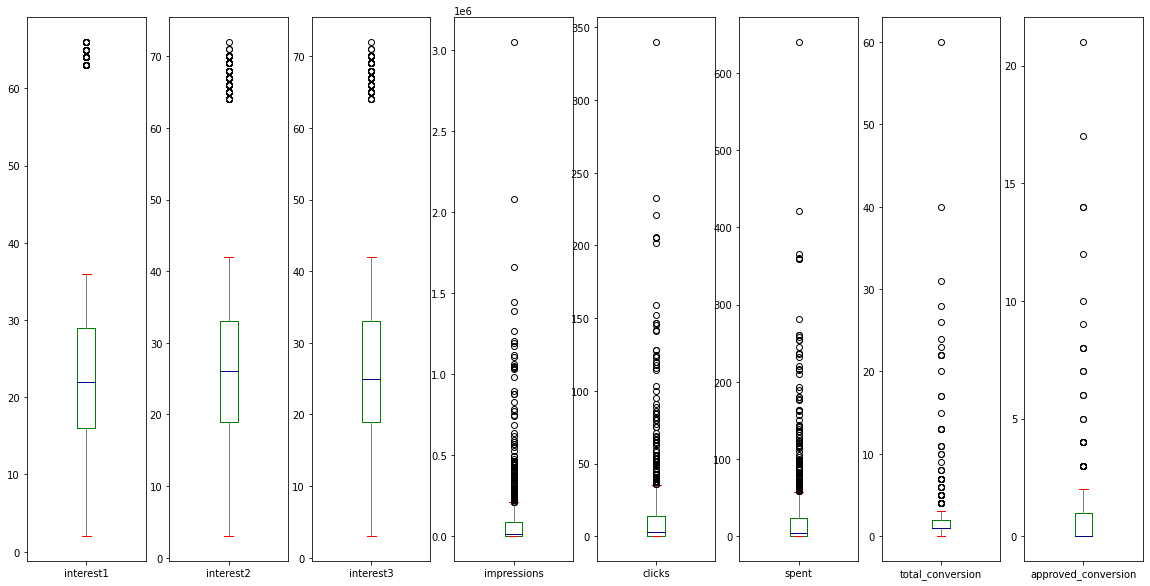

In [8]:
colors={'whiskers':'gray','medians':'DarkBlue','caps':'red','boxes':'green'}
dataset.plot.box(figsize=(20,10),subplots=True,color=colors)

In [9]:
for i in dataset.columns:
    if(i==2 or i==3 or i==4 or i==5):
        print(f'{i}: {dataset[i].unique()}')

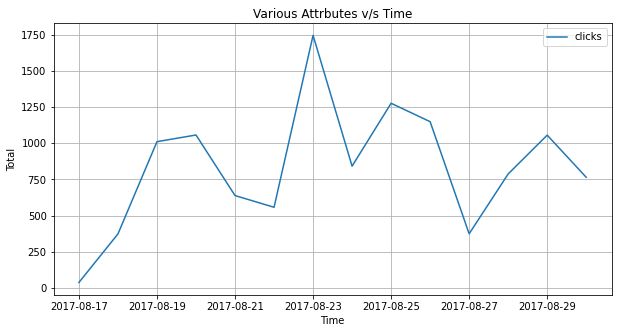

In [10]:
plt.figure(figsize=(10,5))
for i in ['clicks']:
    plt.plot(dt_sorted['reporting_start'],dt_sorted[i],label=f'{i}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Total')
plt.title('Various Attrbutes v/s Time')
plt.grid()